<a href="https://colab.research.google.com/github/dayanamariyathomas/Dayana_portfolio/blob/main/Dayanamariyathomas_DSA_clsfctn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings;   warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/iris.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.shape

(150, 5)

In [ ]:
#finding the unique items in the classification column
df['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#Checking the total number of null values
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
df.SL

0      5.1
1      4.9
2      4.9
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SL, Length: 150, dtype: float64

In [ ]:
#forward filling the values that are null
df=df.fillna(method='ffill')
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.9,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.0,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.isna().sum()   #we replaced the null values

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
#describing the statistics of numerical columns
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.858667,3.048000,3.748667,1.198667
std,0.843068,0.424694,1.759375,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#plotting various scatter plots to see how values are arranged

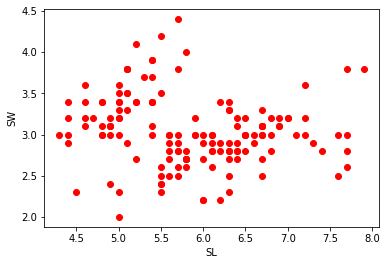

In [ ]:
plt.scatter(df['SL'] , df['SW'] , color = 'r')
plt.xlabel('SL')
plt.ylabel('SW')
plt.show()

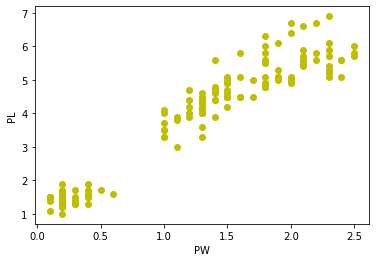

In [ ]:
plt.scatter(df['PW'] , df['PL'] , color = 'y')
plt.xlabel('PW')
plt.ylabel('PL')
plt.show()

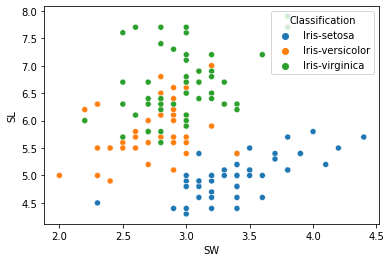

In [ ]:
sns.scatterplot(x='SW', y='SL', hue='Classification', data=df);

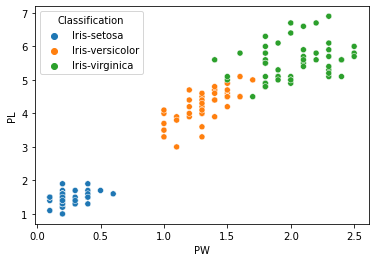

In [ ]:
sns.scatterplot(x='PW', y='PL', hue='Classification', data=df);

In [ ]:
# split the data to train and test for the classification models
x = df.drop(['Classification'],axis=1)

In [ ]:
y = df['Classification']

KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import metrics

train, test = train_test_split(df, test_size = 0.25,random_state=20)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [ ]:
x_train=train[['SL','SW','PL','PW']]
y_train=train['Classification']
x_test=test[['SL','SW','PL','PW']]
y_test=test['Classification']

In [ ]:
x_train.head()

,SL,SW,PL,PW
51,7.0,3.2,4.5,1.5
130,7.4,2.8,6.1,1.9
55,5.7,2.8,4.5,1.3
134,6.1,2.6,5.6,1.4
37,4.9,3.1,1.5,0.1


In [ ]:
y_train.head()

51     Iris-versicolor
130     Iris-virginica
55     Iris-versicolor
134     Iris-virginica
37         Iris-setosa
Name: Classification, dtype: object

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=3) 
KNN.fit(x_train,y_train)
prediction=KNN.predict(x_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test)*100, 
      'percent')

The accuracy of the KNN is 92.10526315789474 percent


In [ ]:
KNN.score(x_test,y_test)

0.9210526315789473

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
prediction=KNN.predict(x_test)
confusion_matrix(y_test,prediction)
    


array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  2, 10]])

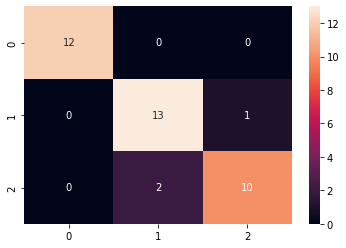

In [ ]:
cf_matrix=confusion_matrix(y_test,prediction)
sns.heatmap(cf_matrix, annot=True);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.87      0.93      0.90        14
 Iris-virginica       0.91      0.83      0.87        12

       accuracy                           0.92        38
      macro avg       0.93      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38



In [ ]:
 #select the algorithm
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
acc=KNN.score(x_test,y_test)
metric_k.append(acc)

In [ ]:
metric_k

[0.9210526315789473]

Classification/Logistic Regression

In [ ]:
train, test = train_test_split(df, test_size = 0.3)
# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% 
#and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [ ]:
x_train=train[['SL','SW','PL','PW']]
y_train=train['Classification']
x_test=test[['SL','SW','PL','PW']]
y_test=test['Classification']

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9777777777777777


Support Vector Machine (SVM)

In [ ]:
from sklearn import svm  

In [ ]:
model = svm.SVC(random_state=42)
# we train the algorithm with the training data and the training output
model.fit(x_train,y_train) 
#now we pass the testing data to the trained algoritham
prediction=model.predict(x_test) 
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,y_test))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9555555555555556


DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.9777777777777777


RandomForest algoritham

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=50)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred_rf=rf_clf.predict(x_test)

In [ ]:
print('accuracy=',metrics.accuracy_score(y_pred_rf,y_test))
print (confusion_matrix(y_test,y_pred_rf))

accuracy= 0.9777777777777777
[[12  0  0]
 [ 0 15  0]
 [ 0  1 17]]


Checking the accuracy for various values of n for K-Nearest neighbors

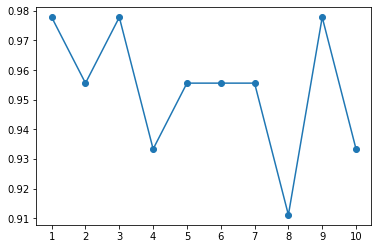

In [ ]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a,'o-')
plt.xticks(x);